# 1. Creating Model

In [1]:
from keras import layers
from keras.models import Sequential

In [2]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())


model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# 2. Compiling Model

In [4]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ["acc"])

# 3. Data Generation

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_directory = "datasets/catdog/train"
validation_directory = "datasets/catdog/validation"

In [7]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = "binary")

validation_generator = train_datagen.flow_from_directory(validation_directory,
                                                         target_size = (150,150),
                                                         batch_size = 20,
                                                         class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 4. Training

In [8]:
history = model.fit_generator(train_generator,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

Epoch 1/20


C:\Users\pc\AppData\Local\Temp\ipykernel_14668\3846436660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 52s 514ms/step - loss: 0.6916 - acc: 0.5233 - val_loss: 0.6985 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 51s 506ms/step - loss: 0.6779 - acc: 0.5648 - val_loss: 0.6655 - val_acc: 0.6150
Epoch 3/20
100/100 [==============================] - 51s 511ms/step - loss: 0.6525 - acc: 0.6208 - val_loss: 0.6536 - val_acc: 0.5790
Epoch 4/20
100/100 [==============================] - 51s 510ms/step - loss: 0.6145 - acc: 0.6558 - val_loss: 0.6206 - val_acc: 0.6490
Epoch 5/20
100/100 [==============================] - 57s 567ms/step - loss: 0.5868 - acc: 0.6898 - val_loss: 0.6075 - val_acc: 0.6700
Epoch 6/20
100/100 [==============================] - 51s 506ms/step - loss: 0.5611 - acc: 0.7104 - val_loss: 0.5936 - val_acc: 0.6730
Epoch 7/20
100/100 [==============================] - 55s 549ms/step - loss: 0.5417 - acc: 0.7244 - val_loss: 0.6487 - val_acc: 0.6260
Epoch 8/20
100/100 [==============================] - 51s 509ms/st

# 5. Visualization

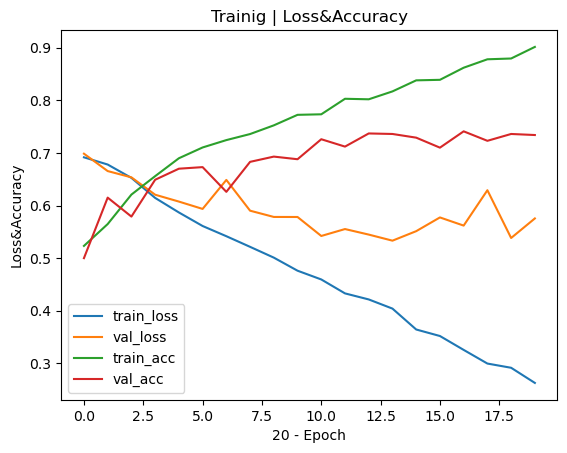

In [9]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 20

plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history.history["val_acc"], label="val_acc")

plt.title("Trainig | Loss&Accuracy")

plt.xlabel("20 - Epoch")
plt.ylabel("Loss&Accuracy")

plt.legend(loc="lower left")

In [10]:
model.save("models/cat_dog_first.h5")

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Problem: Overfitting

1. New Model
2. Data Augmentation

# Creating New Model

In [11]:
model_x = Sequential()

model_x.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(64, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))

model_x.add(layers.Conv2D(128, (3,3), activation = "relu"))
model_x.add(layers.MaxPooling2D((2,2)))


model_x.add(layers.Flatten())
model_x.add(layers.Dropout(0.4))

model_x.add(layers.Dense(512, activation = "relu"))
model_x.add(layers.Dense(1, activation = "sigmoid"))

model_x.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [12]:
model_x.compile(loss = "binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4),
                metrics = ["acc"])

# Image Data Augmentation

In [13]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.3,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = "nearest")

validation_datagen_x = ImageDataGenerator(rescale = 1./255)

In [14]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (150,150),
                                                        batch_size = 16,
                                                        class_mode = "binary")


validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                  target_size = (150,150),
                                                                  batch_size = 16,
                                                                  class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


# Training New Model

In [15]:
history_x = model_x.fit_generator(train_generator_x,
                                  steps_per_epoch = 100,
                                  epochs = 100,
                                  validation_data = validation_generator_x,
                                  validation_steps = 50)

print("Info: Done!")

Epoch 1/100


C:\Users\pc\AppData\Local\Temp\ipykernel_14668\86351582.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_x = model_x.fit_generator(train_generator_x,


100/100 [==============================] - 46s 454ms/step - loss: 0.6964 - acc: 0.4947 - val_loss: 0.6878 - val_acc: 0.5188
Epoch 2/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6915 - acc: 0.5191 - val_loss: 0.6900 - val_acc: 0.4850
Epoch 3/100
100/100 [==============================] - 44s 435ms/step - loss: 0.6844 - acc: 0.5466 - val_loss: 0.6708 - val_acc: 0.5900
Epoch 4/100
100/100 [==============================] - 43s 432ms/step - loss: 0.6744 - acc: 0.5591 - val_loss: 0.7522 - val_acc: 0.5138
Epoch 5/100
100/100 [==============================] - 43s 431ms/step - loss: 0.6678 - acc: 0.5866 - val_loss: 0.6920 - val_acc: 0.5412
Epoch 6/100
100/100 [==============================] - 43s 427ms/step - loss: 0.6659 - acc: 0.5710 - val_loss: 0.6777 - val_acc: 0.5425
Epoch 7/100
100/100 [==============================] - 42s 424ms/step - loss: 0.6593 - acc: 0.5816 - val_loss: 0.6637 - val_acc: 0.5500
Epoch 8/100
100/100 [==============================] - 43s 4

# Visualization New Model

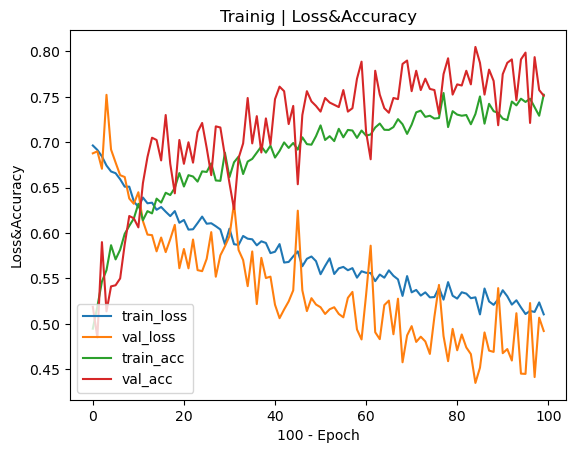

In [17]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 100

plt.plot(np.arange(0,epochs), history_x.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history_x.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"], label="val_acc")

plt.title("Trainig | Loss&Accuracy")

plt.xlabel("100 - Epoch")
plt.ylabel("Loss&Accuracy")

plt.legend(loc="lower left")

In [18]:
model_x.save("models/cat_dog_last.h5")

# Prediction

In [19]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [34]:
model_path = "models/cat_dog_last.h5"
image_path = "datasets/catdog/test/dogs/1513.jpg"

In [ ]:
prediction_model = load_model(model_path,encoding = "latin1")
test_img = load_img(image_path, target_size=(150,150))

In [ ]:
print(test_img)
test_img

In [ ]:
test_img = img_to_array(test_img)
test_img.shape


In [ ]:
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
test_img.shape

In [ ]:
train_generator_x.class_indices

In [ ]:
result = prediction_model.predict(test_img)
result

In [ ]:
if result[0][0] > 0.5:
    label = "Dog"
    print("Prediction: This is a",label)
    
else:
    label = "Cat"
    print("Prediction: This is a", label)

In [ ]:
import cv2

test_img = cv2.imread(image_path)


font = cv2.FONT_HERSHEY_SIMPLEX
color = (255,255,0)
cv2.putText(test_img, label, (20,40), font, 1.0, color, 3)


cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()